In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from math import floor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Load data

In [2]:
target = 'Wind Spd (km/h)'
data = pd.read_csv(str(pathlib.Path("../data/interim/regularized.csv")), 
                   parse_dates=True, infer_datetime_format=True, index_col=0)
# Experiment with differencing (to remove seasonality)
#data[target] = data[target] - data[target].shift(1)
#data[target] = data[target] - data[target].shift(365)
#data.dropna(inplace=True)

### Inspect trend of data

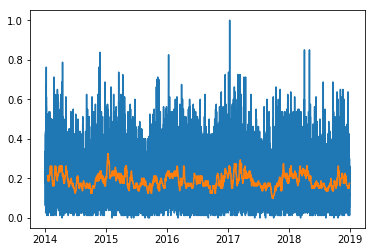

In [3]:
wind_moving_avg_biweek = data[target].rolling(window=24*14).median()
plt.plot(data.loc[:, target])
plt.plot(wind_moving_avg_biweek)
plt.show()

In [4]:
# No evidence of trend (data does not tend upward or downward)

### Inspect seasonality of data

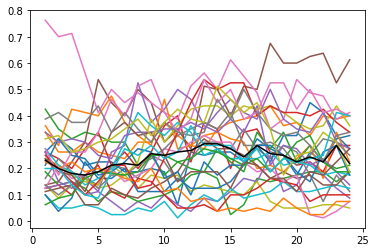

In [10]:
# Daily trend? Plot days by the hourly measurement for a month
days = 30
step = 24 #hours
periods = []
end = floor((step * days) / step)
for i in range(0,end):
    start = i * step
    stop = (i+1) * step
    periods.append(data.iloc[start:stop].loc[:, target])
    plt.plot(np.arange(1,step+1), data.iloc[start:stop].loc[:, target])
median = np.median(periods, axis=0)
plt.plot(np.arange(1,step+1), median, c='black')
plt.show()

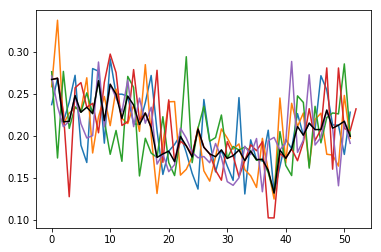

In [7]:
# Yearly trend? Plot years by the weekly mean
periods = []
data_weekly = data.resample('1W').mean()
for year in ['2014', '2015', '2016', '2017', '2018']:
    plt.plot(np.arange(0,data_weekly[year].shape[0]), data_weekly.loc[year, target])
    periods.append(data_weekly.loc[year, target].iloc[:52])
median = np.median(periods, axis=0)
plt.plot(median, c='black')
plt.show()

### Inspect correlation of sequential data

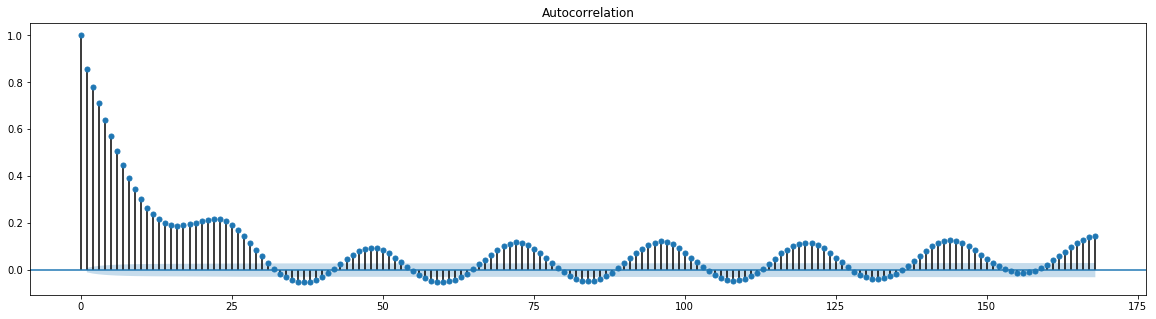

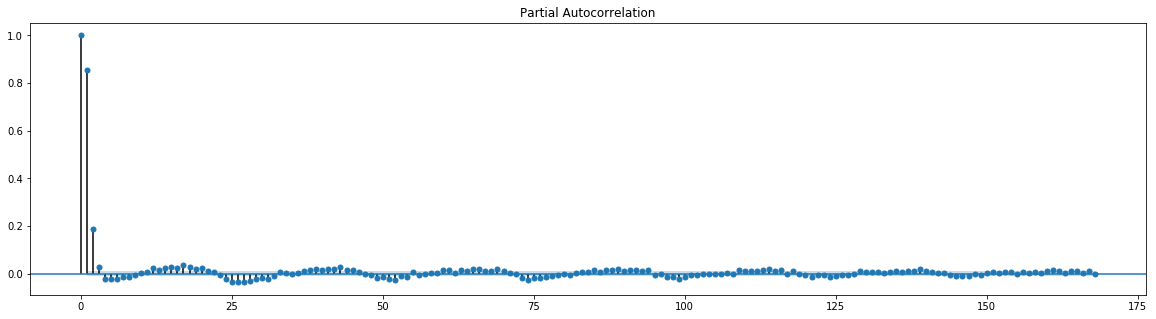

In [7]:
# Short range: one week
fix, ax = plt.subplots(figsize=(20,5))
plot_acf(data[target], lags=24*7, unbiased=True, ax=ax)
plt.show()
fix, ax = plt.subplots(figsize=(20,5))
plot_pacf(data[target], lags=24*7, ax=ax)
plt.show()

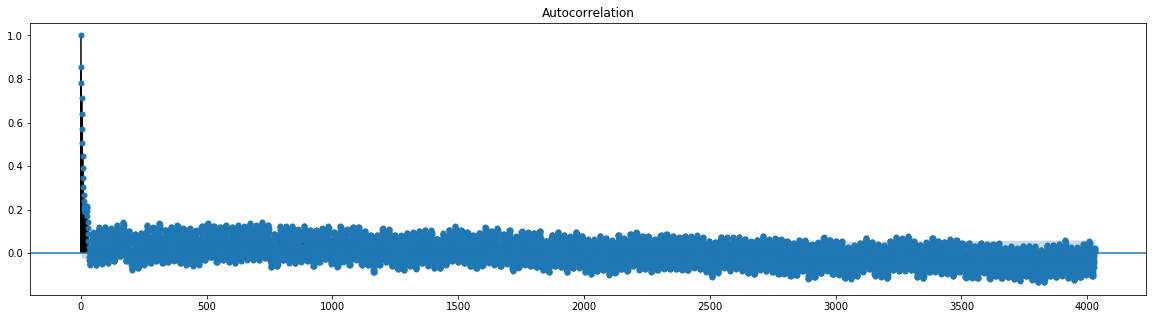

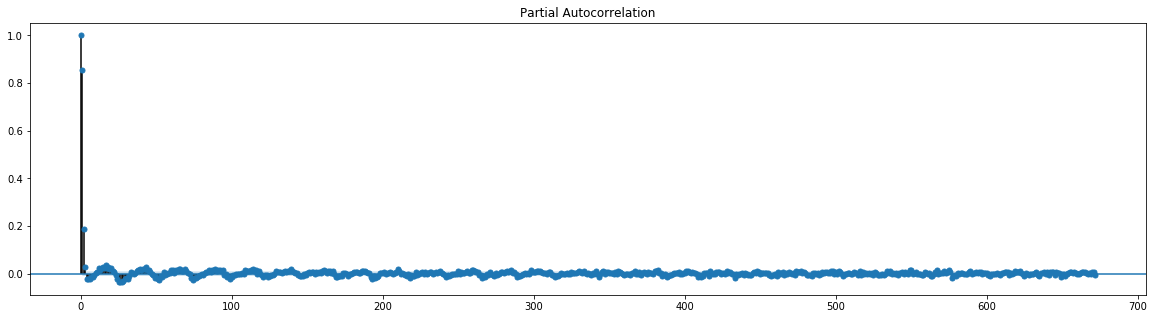

In [8]:
# Long range: one month
fix, ax = plt.subplots(figsize=(20,5))
plot_acf(data[target], lags=24*7*4*6, unbiased=True, ax=ax)
plt.show()
fix, ax = plt.subplots(figsize=(20,5))
plot_pacf(data[target], lags=24*7*4, ax=ax)
plt.show()